In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from predict_prices import predict_prices, get_validation_data, evalute_predictor
from predictors.median import predict_with_median
from predictors.linear_regression_one_variable import predict_with_lot_area
from predictors.linear_regression_all_easy_variables import predict_with_all_easy_linear, predict_with_ridge, predict_with_polynomial_features_and_ridge

(training, validation) = get_validation_data(pd.read_csv("data_from_kaggle/train.csv"))

## Plot actual sale price by square footage in validation to get a sense of the data

In [2]:
def visualize_prices(data):
    plt.scatter(data["GrLivArea"], data["SalePrice"])
    plt.ylim(10000,1000000)
    plt.show() 

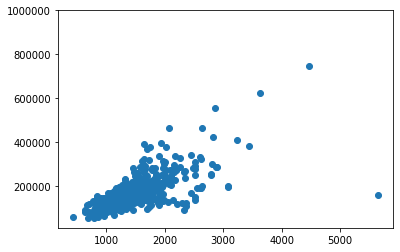

In [3]:
visualize_prices(validation)

## For each predictor, plot predicted sale price by square footage. Also, show RMSE on validation for that predictor.

### Predict that each house in test will have sell for the median price of a house in train:

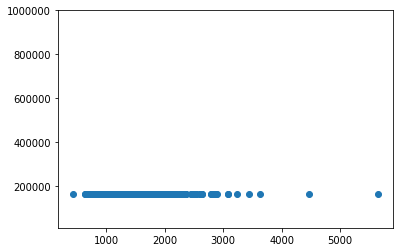

In [4]:
visualize_prices(predict_with_median(training, validation))

In [5]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_median)

0.38540945512003505

### Single variable linear regression using lot area:

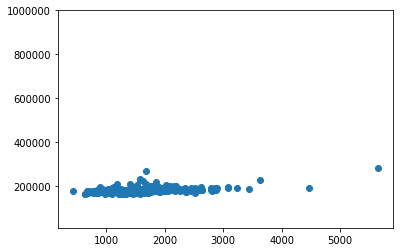

In [6]:
visualize_prices(predict_with_lot_area(training, validation))

In [7]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_lot_area)

0.3806132062743341

### Linear regression using naively all features that are expressed as numbers:

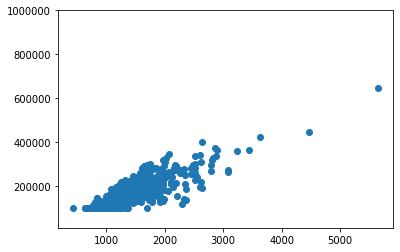

In [8]:
visualize_prices(predict_with_all_easy_linear(training, validation))

In [9]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_all_easy_linear)

0.18779268155549822

### Ridge regression -- a type of regularized linear regression: https://scikit-learn.org/stable/modules/linear_model.html

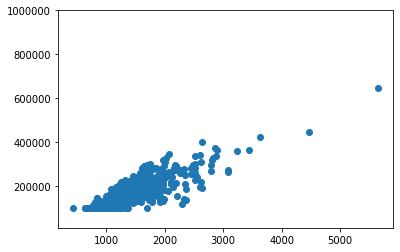

In [10]:
visualize_prices(predict_with_ridge(training, validation))

In [11]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_ridge)

0.18775565074500847

### Polynomial features + ridge regression

{'degree': 2, 'clip': 100000}
2


/Users/brachbach/.local/share/virtualenvs/house_prices-EOgoljp5/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:1441: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_diag) ** 2


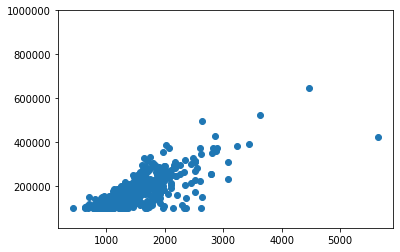

In [12]:
visualize_prices(predict_with_polynomial_features_and_ridge(training, validation, {"degree": 2, "clip": 100000}))

In [13]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_polynomial_features_and_ridge, {"degree": 2, "clip": 100000})

{'degree': 2, 'clip': 100000}
2


/Users/brachbach/.local/share/virtualenvs/house_prices-EOgoljp5/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:1441: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_diag) ** 2


0.18192455236043434

{'degree': 3, 'clip': 100000}
3


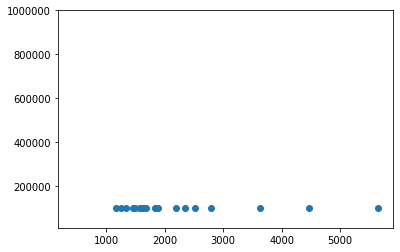

In [16]:
visualize_prices(predict_with_polynomial_features_and_ridge(training, validation, {"degree": 3, "clip": 100000}))

{'degree': 2, 'clip': 10000}
2


/Users/brachbach/.local/share/virtualenvs/house_prices-EOgoljp5/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:1441: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_diag) ** 2


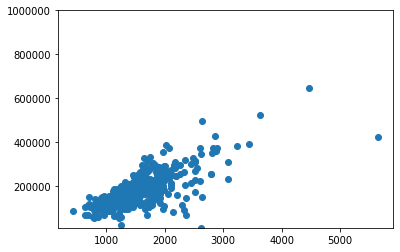

In [17]:
visualize_prices(predict_with_polynomial_features_and_ridge(training, validation, {"degree": 2, "clip": 10000}))

In [25]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_polynomial_features_and_ridge, {"degree": 2, "clip": 10000})

{'degree': 2, 'clip': 10000}
2


/Users/brachbach/.local/share/virtualenvs/house_prices-EOgoljp5/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:1441: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_diag) ** 2


0.2505028935148955